# Cross-Library Visualization Skills

This final notebook moves beyond the specifics of any single library to cover essential concepts and best practices that apply to all data visualization tasks. Mastering these skills will help you create plots that are not only accurate but also effective, clear, and easy to interpret.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

## 1. Choosing the Right Plot for Your Data

The type of plot you choose depends on the story you want to tell and the nature of your variables.

| Relationship | Plot Type | Good for... |
|---|---|---|
| **Distribution** (1 continuous variable) | `histplot`, `kdeplot`, `ecdfplot` | Understanding the spread, central tendency, and shape of your data. |
| **Relationship** (2 continuous variables) | `scatterplot`, `regplot` | Showing the correlation between two numeric variables. |
| **Comparison** (1 continuous, 1 categorical) | `barplot`, `boxplot`, `violinplot`, `stripplot` | Comparing a numeric value across different categories. |
| **Composition** (parts of a whole) | `pie chart` (use with caution), `treemap` | Showing how a total is divided into parts. |
| **Time Series** (data over time) | `lineplot` | Visualizing trends and patterns over a continuous interval. |

## 2. Color Theory & Colorblind-Friendly Palettes

Color is a powerful tool, but it should be used purposefully. Approximately 8% of men and 0.5% of women have some form of color vision deficiency. Using colorblind-friendly palettes is crucial for creating accessible visualizations.

**Good Palettes:**
- **Seaborn:** `viridis`, `plasma`, `magma`, `cividis` are all perceptually uniform and colorblind-friendly.
- **Plotly:** The default palette is designed to be colorblind-friendly.

**Avoid:**
- Rainbow palettes (`jet`): They are not perceptually uniform, meaning they can distort how data is interpreted.
- Red/Green combinations: This is the most common form of color blindness.

In [2]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", 
                 color_discrete_map={
                     'setosa': '#0072B2', # Blue
                     'versicolor': '#D55E00', # Orange
                     'virginica': '#009E73' # Green
                 },
                 title="Scatter plot with Colorblind-Friendly Palette"
                )
fig.show()

## 3. Making Publication-Quality Plots

To make a plot ready for a report or publication, pay attention to the details:

1.  **Clear Labels and Title:** Every plot should have a descriptive title and clearly labeled axes, including units.
2.  **Appropriate Font Size:** Ensure text is readable.
3.  **High Resolution:** Save figures with a high DPI (e.g., `dpi=300`) for raster formats or as a vector format (`.svg`, `.pdf`) for infinite scalability.
4.  **Minimalism:** Remove unnecessary chart junk like excessive grid lines or borders (spines).
5.  **Purposeful Color:** Use color to highlight key information, not just for decoration.

In [4]:
import numpy as np

In [5]:
with plt.style.context('seaborn-v0_8-poster'): # Use a style designed for posters
    fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
    sns.lineplot(x=np.arange(10), y=np.random.rand(10)*10, ax=ax, lw=3)
    
    ax.set_title("A Publication-Quality Plot", fontsize=20, weight='bold')
    ax.set_xlabel("Time (seconds)", fontsize=16)
    ax.set_ylabel("Signal (mV)", fontsize=16)
    sns.despine() # Removes top and right spines
    
    plt.tight_layout()
    fig.savefig("publication_quality.pdf", format='pdf')

## 4. Creating Reusable Plotting Functions

If you find yourself making the same type of plot repeatedly, encapsulate the logic in a function. This makes your code more modular, reusable, and easier to read.

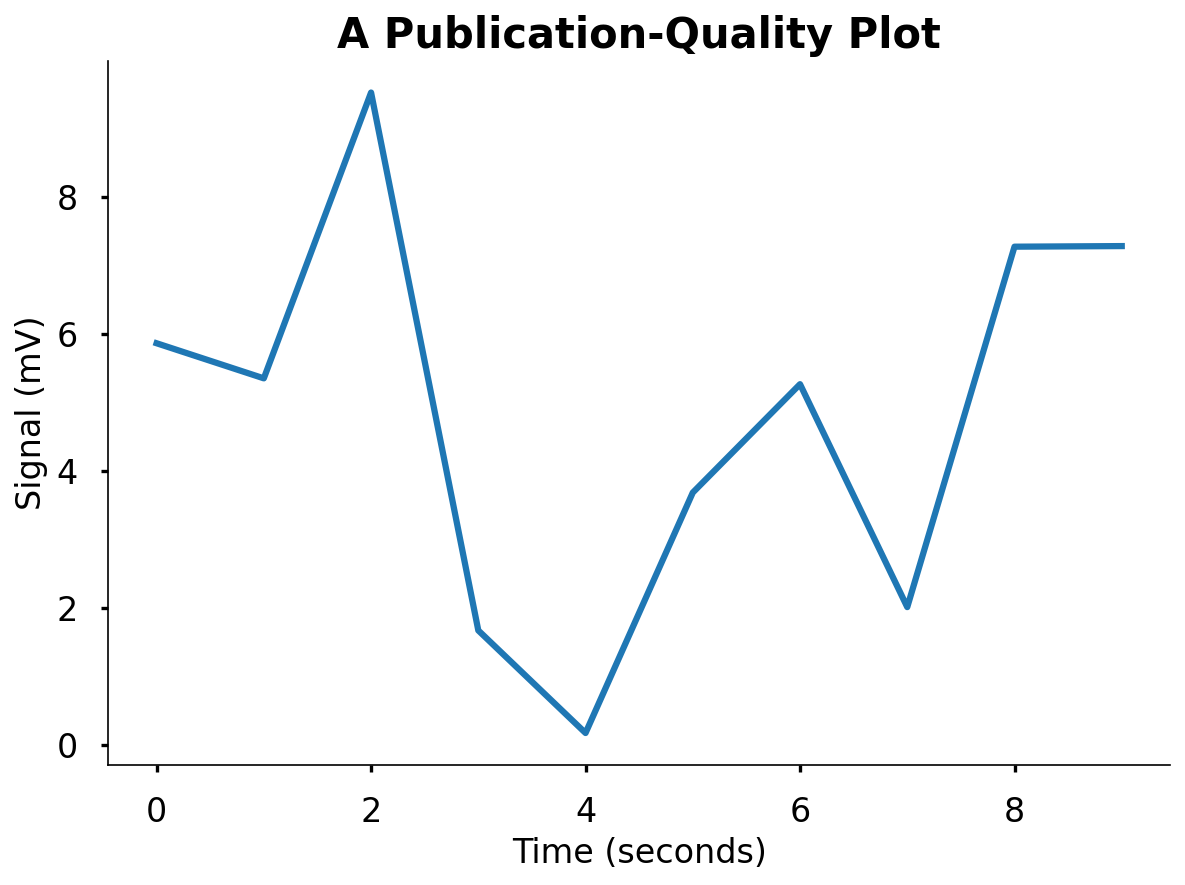

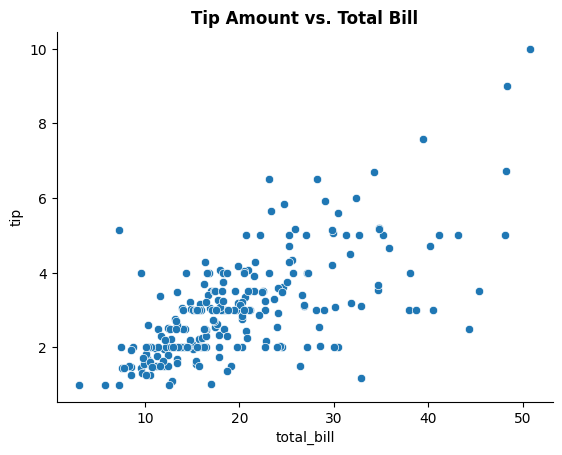

In [6]:
def custom_scatter(data, x_col, y_col, title):
    """Creates a customized scatter plot."""
    fig, ax = plt.subplots()
    sns.scatterplot(data=data, x=x_col, y=y_col, ax=ax)
    ax.set_title(title, weight='bold')
    sns.despine()
    return fig, ax

df_tips = sns.load_dataset('tips')
fig, ax = custom_scatter(df_tips, 'total_bill', 'tip', 'Tip Amount vs. Total Bill')
plt.show()

## 5. Static (Matplotlib/Seaborn) vs. Interactive (Plotly) Trade-offs

| Feature | Static (Matplotlib/Seaborn) | Interactive (Plotly) |
|---|---|---|
| **Best For** | Publications, reports, presentations | Dashboards, web applications, data exploration |
| **Output** | Raster/Vector images (.png, .pdf) | HTML, can be embedded in websites |
| **User Interaction** | None | Zoom, pan, hover, filter |
| **Ease of Use** | Seaborn is high-level; Matplotlib can be complex. | Plotly Express is very high-level and easy. |
| **Customization** | Matplotlib offers total control. | `graph_objects` offers total control. |

**Choose Matplotlib/Seaborn when:**
- You need a static image for a paper or slide.
- You need fine-grained control over every plot element for a specific design.

**Choose Plotly when:**
- You are exploring data and want to zoom in or see values on hover.
- You are building a web-based dashboard (with Dash).
- You want to share an interactive HTML file with a colleague.